<a href="https://colab.research.google.com/github/ZsirosB/PytorchTutorial/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Convert MNIST Image Files into a Tensor of 4 Dimensions (# of images, height, width, color channels)
transform = transforms.ToTensor()

In [3]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 41.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.36MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.3MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.76MB/s]


In [5]:
# Test data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
pwd

'/content'

In [9]:
ls

sample_data/


In [10]:
cd ../


/


In [11]:
pwd

'/'

In [12]:
ls

bin@                        home/    NGC-DL-CONTAINER-LICENSE  srv/
boot/                       kaggle/  opt/                      sys/
cnn_data/                   lib@     proc/                     tmp/
content/                    lib32@   python-apt/               tools/
cuda-keyring_1.1-1_all.deb  lib64@   python-apt.tar.xz*        usr/
datalab/                    libx32@  root/                     var/
dev/                        media/   run/
etc/                        mnt/     sbin@


In [13]:
cd cnn_data

/cnn_data


In [14]:
ls

MNIST/


In [15]:
cd ../

/


In [16]:
ls

bin@                        home/    NGC-DL-CONTAINER-LICENSE  srv/
boot/                       kaggle/  opt/                      sys/
cnn_data/                   lib@     proc/                     tmp/
content/                    lib32@   python-apt/               tools/
cuda-keyring_1.1-1_all.deb  lib64@   python-apt.tar.xz*        usr/
datalab/                    libx32@  root/                     var/
dev/                        media/   run/
etc/                        mnt/     sbin@


In [17]:
cd content/

/content


In [18]:
pwd


'/content'

In [20]:
# Create a small batch size for images .. let's say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [21]:
#Define Our CNN Model
# Describe convolutional layer and what it's doing (2 convolutional layers)
# This is just an example
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [22]:
# Grab MNIST record
for i, (X_Train, y_train) in enumerate(train_data):
  break

In [24]:
X_Train.shape

torch.Size([1, 28, 28])

In [25]:
x = X_Train.view(1,1,28,28)

In [26]:
#Perform our first convolution
x = F.relu(conv1(x)) # Rectified Linear unit for our activation function

In [30]:
x.shape
# 1 single image, 6 is the filters, azert 26x26 mert a széléről a paddinget leszedjük


torch.Size([1, 6, 26, 26])

In [31]:
# Pass thru the pooling layer
x = F.max_pool2d(x, 2,2) # kernel of 2 and stride of 2

In [33]:
x.shape
# 26/2 = 13

torch.Size([1, 6, 13, 13])

In [34]:
# Do our second convolutional layer
x = F.relu(conv2(x))

In [36]:
x.shape
# a padding leszedése miatt kisebb a kép megint

torch.Size([1, 16, 11, 11])

In [37]:
# Pooling layer
x = F.max_pool2d(x, 2,2)

In [38]:
x.shape
# 11/2 = 5.5 -> de kerekitunk 5-re

torch.Size([1, 16, 5, 5])

In [51]:
#Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully connected Layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

    #Forward function
  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2,2)
    # second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    # Re-View to flatten it out
    X = X.view(-1, 16*5*5) # negative one so that we can vary the batch size

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [52]:
# Create an instance of our Model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [53]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # smaller the Learning rate longer its gona take to train


In [54]:
import time
start_time = time.time()

#Create Variables To Track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#For Loops of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the training set. Not flattened
    loss = criterion(y_pred, y_train) # how off are we? Compare the predictions to correct answers in y_train

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got corect from this batch. True = 1, False = 0 sume those up
    trn_corr += batch_corr # keep track as we go along in training


    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Test
  with torch.no_grad(): # No gradient so we don't update our weight and biases with test data
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      tst_corr += (predicted == y_test).sum()  # True-1, False-0

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training took: {total/60} minutes!')

Epoch: 0  Batch: 600 Loss: 0.1623610556125641
Epoch: 0  Batch: 1200 Loss: 0.1502392590045929
Epoch: 0  Batch: 1800 Loss: 0.4744560718536377
Epoch: 0  Batch: 2400 Loss: 0.14238706231117249
Epoch: 0  Batch: 3000 Loss: 0.007758188061416149
Epoch: 0  Batch: 3600 Loss: 0.3836284875869751
Epoch: 0  Batch: 4200 Loss: 0.0038223876617848873
Epoch: 0  Batch: 4800 Loss: 0.0021286322735249996
Epoch: 0  Batch: 5400 Loss: 0.0569545142352581
Epoch: 0  Batch: 6000 Loss: 0.00038789428072050214
Epoch: 1  Batch: 600 Loss: 0.005851339548826218
Epoch: 1  Batch: 1200 Loss: 0.3855525553226471
Epoch: 1  Batch: 1800 Loss: 0.004819948226213455
Epoch: 1  Batch: 2400 Loss: 0.003216963727027178
Epoch: 1  Batch: 3000 Loss: 0.0332382395863533
Epoch: 1  Batch: 3600 Loss: 0.5372857451438904
Epoch: 1  Batch: 4200 Loss: 0.04561494290828705
Epoch: 1  Batch: 4800 Loss: 0.0007510822033509612
Epoch: 1  Batch: 5400 Loss: 0.0001173773780465126
Epoch: 1  Batch: 6000 Loss: 0.14201366901397705
Epoch: 2  Batch: 600 Loss: 0.023733

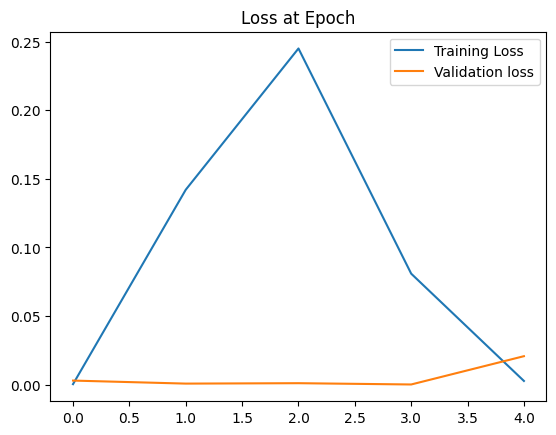

In [55]:
train_losses= [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation loss")
plt.title("Loss at Epoch")
plt.legend()

In [ ]:
#IDE MÉG JÖHETNEK EGYÉB GRAFIKONOK - SOON

In [56]:
# GRAB AN IMAGE
test_data[4143] # Tensor with an image in it.. at the end it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [57]:
#Grab just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [58]:
#Reshape it
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

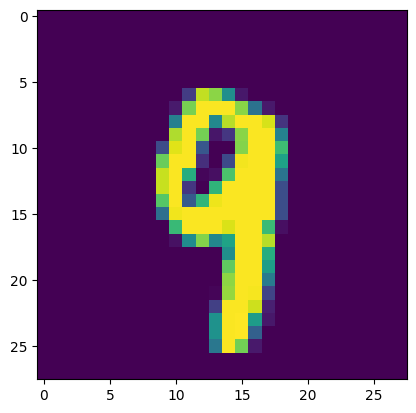

In [59]:
# Show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [60]:
# küldjük át a képet a modellünkön
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28))

In [61]:
new_prediction.argmax()


tensor(9)